In [54]:
import pandas as pd
import os
import datetime
from Parser.TableParser import TableParser
from Parser.HolidaysParser import HolidaysParser

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
!pwd

"pwd" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [57]:
all_df = []
source = 'Datasets/processed_xlsx/'
for directory in os.listdir(source):
    for filepath in os.listdir(source + directory):
        df = pd.read_excel(source + directory + '/' + filepath)
        all_df.append(df)

In [58]:
df = pd.concat(all_df)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166260 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     166260 non-null  int64         
 1   date           163970 non-null  datetime64[ns]
 2   number         166260 non-null  object        
 3   patient        0 non-null       float64       
 4   age            166260 non-null  object        
 5   called by      117411 non-null  object        
 6   address        91371 non-null   object        
 7   Occasion       152641 non-null  object        
 8   Call Type      165895 non-null  object        
 9   Sick Type      158771 non-null  object        
 10  Diagnose       160128 non-null  object        
 11  Result         163871 non-null  object        
 12  Delivered to   166175 non-null  object        
 13  brigade        0 non-null       float64       
 14  substation     163957 non-null  object        
 15  Ac

In [60]:
df = df.drop(['Unnamed: 0', 'patient', 'hospitalized', 'executive', 'brigade', 'address', 'number', 'called by'], axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166260 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           163970 non-null  datetime64[ns]
 1   age            166260 non-null  object        
 2   Occasion       152641 non-null  object        
 3   Call Type      165895 non-null  object        
 4   Sick Type      158771 non-null  object        
 5   Diagnose       160128 non-null  object        
 6   Result         163871 non-null  object        
 7   Delivered to   166175 non-null  object        
 8   substation     163957 non-null  object        
 9   Accepted time  166170 non-null  datetime64[ns]
 10  Arrived time   166168 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(8)
memory usage: 15.2+ MB


In [62]:
df = df.dropna()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141791 entries, 0 to 9234
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           141791 non-null  datetime64[ns]
 1   age            141791 non-null  object        
 2   Occasion       141791 non-null  object        
 3   Call Type      141791 non-null  object        
 4   Sick Type      141791 non-null  object        
 5   Diagnose       141791 non-null  object        
 6   Result         141791 non-null  object        
 7   Delivered to   141791 non-null  object        
 8   substation     141791 non-null  object        
 9   Accepted time  141791 non-null  datetime64[ns]
 10  Arrived time   141791 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(8)
memory usage: 13.0+ MB


In [64]:
def setSeason(a):
    if a in (1, 2, 12):
        season = 'Winter'
    elif a in (3, 4, 5):
        season = 'Spring'
    elif a in (6, 7, 8):
        season = 'Summer'
    elif a in (9, 10, 11):
        season = 'Autumn'
    else:
        season = None
    return season

In [65]:
df['season'] = df['date'].dt.month.apply(setSeason)

In [66]:
df['season'].head()

0    Winter
1    Winter
3    Winter
4    Winter
6    Winter
Name: season, dtype: object

In [67]:
def setDayOfWeek(a):
    if a == 0:
        day = 'Monday'
    elif a == 1:
        day = 'Tuesday'
    elif a == 2:
        day = 'Wednesday'
    elif a == 3:
        day = 'Thursday'
    elif a == 4:
        day = 'Friday'
    elif a == 5:
        day = 'Saturday'
    elif a == 6:
        day = 'Sunday'
    else:
        day = None
    return day

In [68]:
df['dayOfWeek'] = df['date'].dt.dayofweek.apply(setDayOfWeek)

In [69]:
df['dayOfWeek'].head()

0    Wednesday
1    Wednesday
3    Wednesday
4    Wednesday
6    Wednesday
Name: dayOfWeek, dtype: object

In [70]:
df['Accepted time'] = pd.to_datetime(df['Accepted time'], format="%Y-%m-%d %H:%M:%S")
df['Arrived time'] = pd.to_datetime(df['Arrived time'], format="%Y-%m-%d %H:%M:%S")

In [71]:
df['Accepted time'] = df['Accepted time'].dt.time.astype(str).str[:8]

In [72]:
df['Arrived time'] = df['Arrived time'].dt.time.astype(str).str[:8]

In [73]:
all_weather_dfs = []
for year in [2020, 2021, 2022]:
    weather_dfs = pd.read_excel(f'additionalData/weather/{year}.xls', skiprows=6)
    all_weather_dfs.append(weather_dfs)
df_weather = pd.concat(all_weather_dfs)

In [74]:
df_weather = df_weather.rename({'Местное время в Нижнем Новгороде':'datetime'}, axis=1)
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])

In [75]:
df_weather['date'] = df_weather['datetime'].dt.date.astype('datetime64')

In [76]:
df_weather['date']

0      2020-12-31
1      2020-12-31
2      2020-12-31
3      2020-12-31
4      2020-12-31
          ...    
1203   2022-01-01
1204   2022-01-01
1205   2022-01-01
1206   2022-01-01
1207   2022-01-01
Name: date, Length: 7056, dtype: datetime64[ns]

In [77]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 1207
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  7056 non-null   datetime64[ns]
 1   T         7056 non-null   float64       
 2   Po        7051 non-null   float64       
 3   P         7051 non-null   float64       
 4   Pa        7045 non-null   float64       
 5   U         7056 non-null   int64         
 6   DD        7056 non-null   object        
 7   Ff        7056 non-null   int64         
 8   ff10      5501 non-null   float64       
 9   ff3       5804 non-null   float64       
 10  N         7047 non-null   object        
 11  WW        7056 non-null   object        
 12  W1        2453 non-null   object        
 13  W2        2453 non-null   object        
 14  Tn        1154 non-null   float64       
 15  Tx        881 non-null    float64       
 16  Cl        6102 non-null   object        
 17  Nh        6102

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141791 entries, 0 to 9234
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           141791 non-null  datetime64[ns]
 1   age            141791 non-null  object        
 2   Occasion       141791 non-null  object        
 3   Call Type      141791 non-null  object        
 4   Sick Type      141791 non-null  object        
 5   Diagnose       141791 non-null  object        
 6   Result         141791 non-null  object        
 7   Delivered to   141791 non-null  object        
 8   substation     141791 non-null  object        
 9   Accepted time  141791 non-null  object        
 10  Arrived time   141791 non-null  object        
 11  season         141791 non-null  object        
 12  dayOfWeek      141791 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 15.1+ MB


In [79]:
holidays = []
for year in (2020, 2021, 2022):
    holidays.extend(HolidaysParser.get_holidays(year))

In [80]:
holidays = [datetime.datetime.strptime(holiday, "%d.%m.%Y") for holiday in holidays]

In [81]:
holidays_ser = pd.DataFrame({'holiday day': 1, 'date': holidays})

In [82]:
holidays_ser

,holiday day,date
0,1,2020-01-01
1,1,2020-01-02
2,1,2020-01-03
3,1,2020-01-04
4,1,2020-01-05
...,...,...
394,1,2022-12-17
395,1,2022-12-18
396,1,2022-12-24
397,1,2022-12-25


In [83]:
total_df = df.merge(df_weather, on='date').merge(holidays_ser, on='date', how='left')

In [84]:
total_df['holiday day'] = total_df['holiday day'].fillna(0)

In [85]:
import seaborn as sns

In [86]:
total_df.head()

,date,age,Occasion,Call Type,Sick Type,Diagnose,Result,Delivered to,substation,Accepted time,Arrived time,season,dayOfWeek,datetime,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,holiday day
0,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,Winter,Wednesday,2020-01-01 21:00:00,-5.4,742.3,757.3,1.8,83,"Ветер, дующий с запада",2,5.0,7.0,"90 или более, но не 100%",Состояние неба в общем не изменилось. Диаметр...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучево-дождевые волокнистые (часто с наковальн...,70 – 80%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.8,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,Winter,Wednesday,2020-01-01 18:00:00,-4.0,740.5,755.3,2.1,99,"Ветер, дующий с севера",2,5.0,5.0,70 – 80%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,0.0,Кучево-дождевые волокнистые (часто с наковальн...,40%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-4.2,7,12.0,NaN,NaN,NaN,NaN,1.0
2,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,Winter,Wednesday,2020-01-01 15:00:00,-3.9,738.4,753.2,2.4,99,"Ветер, дующий с севера",2,4.0,9.0,70 – 80%.,Состояние неба в общем не изменилось.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-4.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,Winter,Wednesday,2020-01-01 12:00:00,-3.2,736.0,750.7,3.1,90,"Ветер, дующий с севера",3,7.0,9.0,70 – 80%.,Снег неливневый.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,"оказана помощь, больной оставлен на месте","ГБУЗ НО ""Городская поликлиника №7"" (ул. Верхне...",ПСМП №7,09:46:15,09:52:22,Winter,Wednesday,2020-01-01 09:00:00,-0.2,732.9,747.4,2.0,100,"Штиль, безветрие",0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения. ...,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,-0.2,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,200-300,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [87]:
df_diagnose = total_df[['date', 'age', 'Occasion', 'Call Type', 'Sick Type', 'Diagnose', 'season', 'dayOfWeek', 'T', 'P', 'U', 'holiday day']]

In [88]:
df_diagnose.head()

,date,age,Occasion,Call Type,Sick Type,Diagnose,season,dayOfWeek,T,P,U,holiday day
0,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-5.4,757.3,83,1.0
1,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-4.0,755.3,99,1.0
2,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-3.9,753.2,99,1.0
3,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-3.2,750.7,90,1.0
4,2020-01-01,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-0.2,747.4,100,1.0


In [89]:
df_diagnose['year'] = df_diagnose['date'].dt.year

C:\Users\A\AppData\Local\Temp\ipykernel_12448\3785887982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnose['year'] = df_diagnose['date'].dt.year


In [90]:
df_diagnose['month'] = df_diagnose['date'].dt.month

C:\Users\A\AppData\Local\Temp\ipykernel_12448\487454834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diagnose['month'] = df_diagnose['date'].dt.month


In [91]:
df_diagnose = df_diagnose.drop('date', axis = 1)

In [92]:
df_diagnose.head()

,age,Occasion,Call Type,Sick Type,Diagnose,season,dayOfWeek,T,P,U,holiday day,year,month
0,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-5.4,757.3,83,1.0,2020,1
1,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-4.0,755.3,99,1.0,2020,1
2,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-3.9,753.2,99,1.0,2020,1
3,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-3.2,750.7,90,1.0,2020,1
4,26 лет,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,Winter,Wednesday,-0.2,747.4,100,1.0,2020,1


In [95]:
df_diagnose = df_diagnose.dropna()

In [96]:
df_diagnose = pd.concat([df_diagnose, 
                 pd.get_dummies(df_diagnose['Occasion'], prefix="Occasion"), 
                 pd.get_dummies(df_diagnose['Call Type'], prefix="Call Type"),
                 pd.get_dummies(df_diagnose['Sick Type'], prefix="Sick Type"),
                 pd.get_dummies(df_diagnose['season'], prefix="season"),
                 pd.get_dummies(df_diagnose['dayOfWeek'], prefix="dayOfWeek"),
                 pd.get_dummies(df_diagnose['month'], prefix="month")], 
                 axis=1)

In [44]:
df_diagnose.drop(['age','Occasion','Call Type', 'Sick Type', 'season', 'dayOfWeek', 'month'], axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
target = le.fit_transform(df_diagnose['Diagnose'])

In [48]:
df_diagnose.drop('Diagnose', axis=1, inplace=True)

In [49]:
df_diagnose.head()

,T,P,U,holiday day,year,Occasion_Авария (дтп) 1-2 пострадавших,Occasion_Авария (дтп) 3-9 пострадавших,"Occasion_Аллергия, задыхается, слабость (взрослый)","Occasion_Аллергия, задыхается, слабость (ребенок)","Occasion_Аллергия, сыпь (взрослый)","Occasion_Аллергия, сыпь (ребенок)",Occasion_Аритмия,Occasion_Без сознания,Occasion_Без сознания (в общественном месте),Occasion_Без сознания (онкология),Occasion_Без сознания (сахарный диабет),"Occasion_Без сознания (судороги, парализовало?)",Occasion_Беспокоится ребёнок >1 без дополнительных жалоб,Occasion_Болезненная менструация (альгодисменоррея),Occasion_Боли в горле без нарушения дыхания,"Occasion_Боли в руках, ногах","Occasion_Боли в руках, ногах (отеки)",Occasion_Болит все (онкология),Occasion_Болит живот (взрослый),Occasion_Болит живот (ребенок),Occasion_Болит живот в общественном месте (взрослый),Occasion_Болит живот у беременной,Occasion_Болит поясница (почечная колика?),"Occasion_Болит спина (остеохондроз, невралгия)","Occasion_Болит ухо, горло у ребенка","Occasion_Болит ухо, горло, температура (взрослый)","Occasion_Боль в груди (колющая,ноющая и пр.) без других жалоб","Occasion_Боль в груди (слабость, потливость, либо впервые)","Occasion_Боль в груди (удушье, одышка)",Occasion_Боль в груди у ребенка,"Occasion_Боль в груди, задыхается (хронический пациент)",Occasion_Боль внезапная в конечностях,Occasion_Боль при мочеиспускании без примеси крови в моче,Occasion_Болят зубы без признаков периостита,Occasion_Воспалительные заболевания кожи и подкожной клетчатки,Occasion_Выброс опасных веществ,"Occasion_Выпала трубка, дренаж","Occasion_Высокое ад, головная боль, тошнота, рвота","Occasion_Гестоз (повышение ад, отеки)","Occasion_Головная боль (мигрень, орви, остеохондроз)","Occasion_Головная боль (ребенок), травмы нет","Occasion_Головная боль, повышенное ад у беременной",Occasion_Дежурство в зоне угрозы чс,Occasion_Диспепсия без признаков интоксикации,Occasion_Задыхается (нарушение сердечного ритма),"Occasion_Задыхается, кашель (ребенок)","Occasion_Задыхается, приступ бронхиальной астмы","Occasion_Задыхается, трудно дышать постоянно (онкология)",Occasion_Инородное тело (в носу) у ребенка,Occasion_Инородное тело (в ухе) у ребенка,"Occasion_Инородное тело (в ухе, в носу) у взрослого",Occasion_Инородное тело в жкт (ребенок проглотил),"Occasion_Кашель у взрослого (без удушья, температура)","Occasion_Кашель у ребенка (не задыхается, &laquo;послушать&raquo;)","Occasion_Кашель, не связанный с травмой, аллергией, инородным телом","Occasion_Констатация, умер",Occasion_Кровотечение (гинекология),Occasion_Кровотечение без травмы,"Occasion_Кровотечение у беременной (угроза прерывания, аборт)",Occasion_Кровохаркание,Occasion_Механическая асфиксия (повешение),Occasion_Многочасовая икота,"Occasion_Нарушение мочеиспускания (острая задержка, кровь в моче)","Occasion_Нарушение стула (запор длительный, боли в животе, рвота)","Occasion_Нарушение стула у ребенка, без болей",Occasion_Насморк без подозрения на гайморит,"Occasion_Низкое давление (головокружение, слабость)","Occasion_Ножевое ранение (конечности, неизвестно)","Occasion_Ножевое ранение (шея, грудь, живот)",Occasion_Обморожение,Occasion_Обморок (пришел в сознание) не впервые,Occasion_Обморок (пришел в сознание) причина неизвестна,Occasion_Огнестрельное ранение,Occasion_Ожог (термический) ребенок,Occasion_Ожог (термический) у взрослого,Occasion_Ожог (химический) взрослый,"Occasion_Ожог (химический), ребенок",Occasion_Отек квинке (взрослый),Occasion_Отек квинке (ребенок),"Occasion_Отравление (ядом, газом, медикаментами) взрослый в сознании",Occasion_Отравление неизвестным веществом (ребенок),"Occasion_Отравление неизвестным веществом, взрослый (в сознании)",Occasion_Падение с высоты,Occasion_Парализовало (в сознании),Occasion_Плачет (ребенок),"Occasion_Плохо (онкобольной, в сознании)","Occasion_Плохо (после инсульта, лежачий, в сознании)",Occasion_Плохо (после употребления алкоголя),Occasion_Плохо (сахарный диабет),Occasion_Плохо взрослому в общ

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df_train, df_test, train_target, test_target = train_test_split(df_diagnose, target, test_size=0.3,
random_state=17)

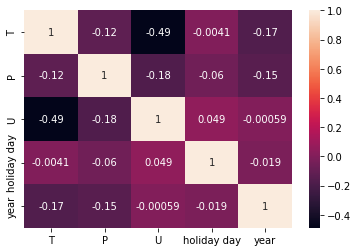

In [52]:
cols = ['T', 'P', 'U', 'holiday day', 'year']
hm = sns.heatmap(df_diagnose[cols].corr(),
                 cbar=True,
                 annot=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df_train, train_target)
pred = model.predict(df_test)
r2_score(test_target, pred)